In [494]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from vecstack import StackingTransformer

In [466]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# Age를 머신러닝으로 예측 후 Survived 예측

In [467]:
data_df = pd.read_csv('titanic.csv') #타이타닉 데이터 셋을 불러온다.
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [468]:
y_data_survived = data_df['Survived'] #타겟 데이터 설정

In [469]:
del data_df['Survived'] # 입력 데이터 설정
x_data = data_df.copy()
x_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 데이터 전처리

In [470]:
x_data['Sex']= x_data['Sex'].replace(['male','female'],[0,1]) # 남 0 여 1
x_data.drop(['PassengerId', 'Ticket','Name'], axis=1, inplace=True)  # 열 없는 데이터 삭제
x_data[x_data['Age'].isnull()] #

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,3,0,NaN,0,0,8.4583,NaN,Q
17,2,0,NaN,0,0,13.0000,NaN,S
19,3,1,NaN,0,0,7.2250,NaN,C
26,3,0,NaN,0,0,7.2250,NaN,C
28,3,1,NaN,0,0,7.8792,NaN,Q
29,3,0,NaN,0,0,7.8958,NaN,S
31,1,1,NaN,1,0,146.5208,B78,C
32,3,1,NaN,0,0,7.7500,NaN,Q
36,3,0,NaN,0,0,7.2292,NaN,C
42,3,0,NaN,0,0,7.8958,NaN,C


In [471]:
new_cabin = []
t =  list(x_data['Cabin'])
t[0]

for i in list(x_data['Cabin']):
    if(pd.isna(i)):
        new_cabin.append(0)
    else:
        if(i[:1]=='A'):
            new_cabin.append(1)
        elif(i[:1]=='B'):
            new_cabin.append(2)
        elif(i[:1]=='C'):
            new_cabin.append(3)
        elif(i[:1]=='D'):
            new_cabin.append(4)
        elif(i[:1]=='E'):
            new_cabin.append(5)
        elif(i[:1]=='F'):
            new_cabin.append(6)
        elif(i[:1]=='G'):
            new_cabin.append(7)
        elif(i[:1]=='T'):
            new_cabin.append(8)
        else:
            new_cabin.append('test')

set(new_cabin)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [472]:
x_data.drop('Cabin', axis=1, inplace=True)

x_data.insert(6, 'New_cabin', new_cabin)

x_data['Embarked'] = x_data['Embarked'].fillna(method='ffill')

x_data['Embarked']= x_data['Embarked'].replace(['S','C', 'Q'],[0,1,2])
x_data['Embarked'].value_counts()

0    644
1    169
2     78
Name: Embarked, dtype: int64

# 'Age' predict Process

In [473]:
data_df_test = x_data[x_data['Age'].isna()]
data_df = x_data[~x_data['Age'].isna()]

In [474]:
y_data = data_df['Age']
del data_df['Age']
x_data = data_df.copy()

In [475]:
x_train = x_data
y_train = y_data

# Feature Scaling

In [476]:
numeric_features = ['SibSp', 'Parch', 'Fare']
numeric_transformer = StandardScaler() # cf) RobustScaler

categorical_features = ['Pclass', 'Sex', 'New_cabin', 'Embarked']
# categorical_transformer = OneHotEncoder(categories='auto') # categories='auto' : just for ignoring warning messages
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown = 'ignore') # categories='auto' : just for ignoring warning messages

preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [477]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])

preprocessor_pipe.fit(x_train)

x_train_transformed = preprocessor_pipe.transform(x_train)
# x_test_transformed = preprocessor_pipe.transform(x_test)

# 'Age' predict

In [478]:
model1 = GradientBoostingRegressor(n_estimators=200, random_state=0)
model1.fit(x_train_transformed, y_train) # <- x_train_transformed (not x_train)

accuracy = model1.score(x_train_transformed, y_train)
print("LinearRegression model score:", round(accuracy, 4))
rmse = np.sqrt(mean_squared_error(y_train, model1.predict(x_train_transformed)))
print("GradientBoostingRegressor model rmse:", round(rmse, 4))

LinearRegression model score: 0.5765
GradientBoostingRegressor model rmse: 9.4473


In [479]:
x_test = data_df_test.drop('Age', axis=1)
x_test_transformed = preprocessor_pipe.transform(x_test)
y_predict = model1.predict(x_test_transformed)

In [480]:
y_predict

array([30.50181064, 32.57070748, 19.09829672, 28.39291144, 23.865104  ,
       28.77877626, 50.57786244, 25.77360725, 26.28767283, 26.74286928,
       29.50008661, 36.25319019, 25.77360725, 19.22493191, 44.33203041,
       41.73007098, 17.72527168, 28.77877626, 29.50008661, 23.07411041,
       29.50008661, 29.50008661, 28.77877626, 28.45325333, 30.62032301,
       29.50008661, 39.35877903,  7.78453976, 21.2761114 , 29.69769932,
       27.73507973,  8.21381174, 30.38346487, 47.48560242, 10.29441048,
       11.50209338, 31.03670919, 38.66486766, 31.37247692, 39.35877903,
       25.77360725,  8.21381174, 36.65740482, 28.77877626, 10.18065827,
       24.85423238, 22.22313757, 31.37247692, 29.69769932, 34.66967471,
       39.35877903, 25.77360725, 42.58241576, 25.77360725, 34.44854631,
       55.95475116, 41.73007098, 43.2327335 , 25.77360725, 28.63703842,
       38.21685083, 29.50008661, 32.08661521,  8.21381174, 23.66782721,
       34.86851646, 28.77877626, 26.88049349, 45.97667654, 28.39

In [481]:
x_test.insert(2, 'Age', y_predict)

In [482]:
x_train.insert(2, 'Age', y_train)

# predict한 Age 값과  기존의 데이터 병합

In [483]:
x_train_withIndex = x_train.reset_index()
x_train_withIndex

,index,Pclass,Sex,Age,SibSp,Parch,Fare,New_cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,3,1
2,2,3,1,26.0,0,0,7.9250,0,0
3,3,1,1,35.0,1,0,53.1000,3,0
4,4,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
709,885,3,1,39.0,0,5,29.1250,0,2
710,886,2,0,27.0,0,0,13.0000,0,0
711,887,1,1,19.0,0,0,30.0000,2,0
712,889,1,0,26.0,0,0,30.0000,3,1


In [484]:
x_test_withIndex = x_test.reset_index()
x_test_withIndex

,index,Pclass,Sex,Age,SibSp,Parch,Fare,New_cabin,Embarked
0,5,3,0,30.501811,0,0,8.4583,0,2
1,17,2,0,32.570707,0,0,13.0000,0,0
2,19,3,1,19.098297,0,0,7.2250,0,1
3,26,3,0,28.392911,0,0,7.2250,0,1
4,28,3,1,23.865104,0,0,7.8792,0,2
5,29,3,0,28.778776,0,0,7.8958,0,0
6,31,1,1,50.577862,1,0,146.5208,2,1
7,32,3,1,25.773607,0,0,7.7500,0,2
8,36,3,0,26.287673,0,0,7.2292,0,1
9,42,3,0,26.742869,0,0,7.8958,0,1


In [485]:
x_total_data = pd.concat([x_train_withIndex, x_test_withIndex])
x_total_data = x_total_data.sort_values('index')
x_total_data = x_total_data.set_index('index')
x_total_data.tail(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,New_cabin,Embarked
index,,,,,,,,
871,1,1,47.000000,1,1,52.5542,4,0
872,1,0,33.000000,0,0,5.0000,2,0
873,3,0,47.000000,0,0,9.0000,0,0
874,2,1,28.000000,1,0,24.0000,0,1
875,3,1,15.000000,0,0,7.2250,0,1
876,3,0,20.000000,0,0,9.8458,0,0
877,3,0,19.000000,0,0,7.8958,0,0
878,3,0,28.778776,0,0,7.8958,0,0
879,1,1,56.000000,0,1,83.1583,3,1


# 'Survive' predict Process

In [486]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_total_data, 
                                                                    y_data_survived, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

# Feature Scaling

In [487]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = StandardScaler() # cf) RobustScaler

categorical_features = ['Pclass', 'Sex', 'New_cabin', 'Embarked']
# categorical_transformer = OneHotEncoder(categories='auto') # categories='auto' : just for ignoring warning messages
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown = 'ignore') # categories='auto' : just for ignoring warning messages

preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [488]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])

preprocessor_pipe.fit(x_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex', 'New_cabin',
                                                   'Embarked'])]))])

In [489]:
x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

# 'Survive' predict

In [490]:
model1 = GradientBoostingClassifier(n_estimators=200, random_state=0)
model1.fit(x_train_transformed, y_train) # <- x_train_transformed (not x_train)

accuracy = model1.score(x_test_transformed, y_test)
print("GradientBoostingClassifier model score:", round(accuracy, 4))

GradientBoostingClassifier model score: 0.8619


In [491]:
model2 = linear_model.LogisticRegression()
model2.fit(x_train_transformed, y_train) # <- x_train_transformed (not x_train)

accuracy = model2.score(x_test_transformed, y_test)
print("LogisticRegression model score:", round(accuracy, 4))

LogisticRegression model score: 0.8209


In [498]:
model3 = SVC(probability=True)
model3.fit(x_train_transformed, y_train) # <- x_train_transformed (not x_train)

accuracy = model3.score(x_test_transformed, y_test)
print("SVC model score:", round(accuracy, 4))

SVC model score: 0.806


In [493]:
model4 = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, n_estimators = 260, max_depth = 3)
model4.fit(x_train_transformed, y_train) # <- x_train_transformed (not x_train)

accuracy = model4.score(x_test_transformed, y_test)
print("SVC model score:", round(accuracy, 4))

SVC model score: 0.8694


# ROC

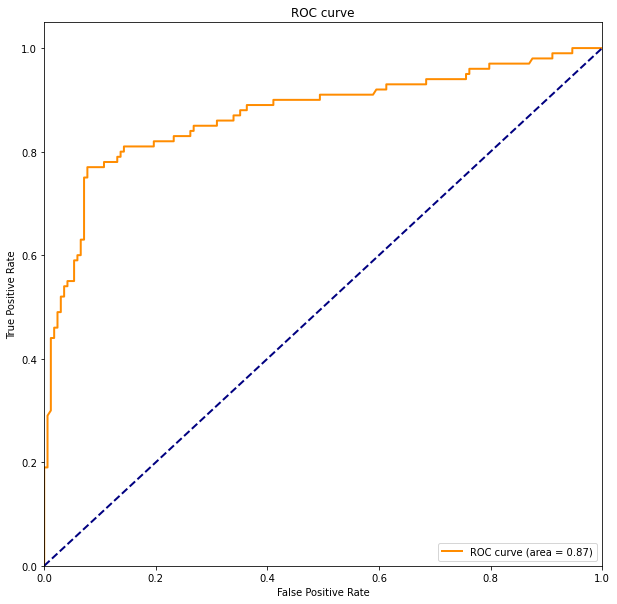

In [495]:
# test Data의 target값과 모델이 추정한 Survive할 확률을 넣어준다.
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=model1.predict_proba(x_test_transformed)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

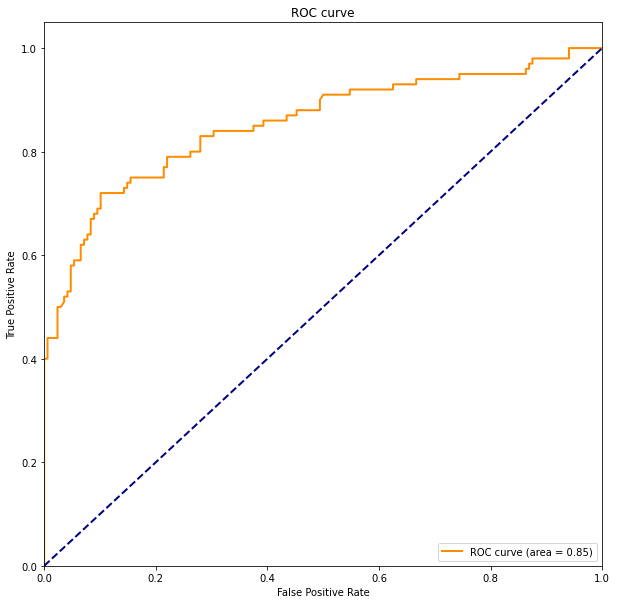

In [496]:
# test Data의 target값과 모델이 추정한 Survive할 확률을 넣어준다.
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=model2.predict_proba(x_test_transformed)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

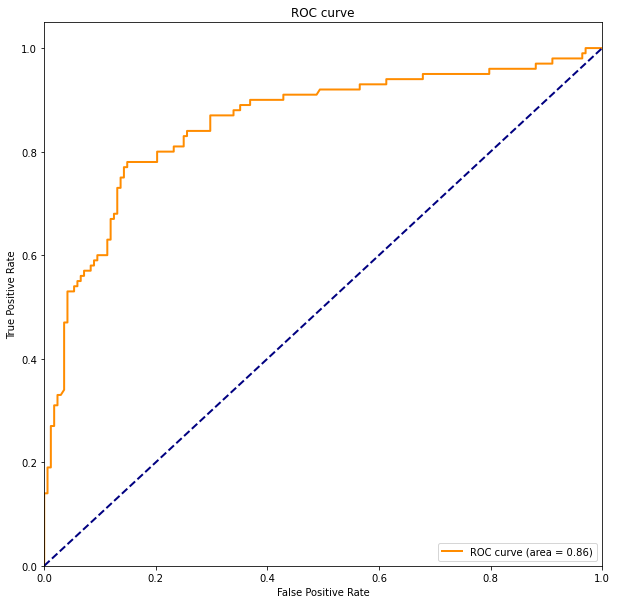

In [499]:
# test Data의 target값과 모델이 추정한 Survive할 확률을 넣어준다.
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=model3.predict_proba(x_test_transformed)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

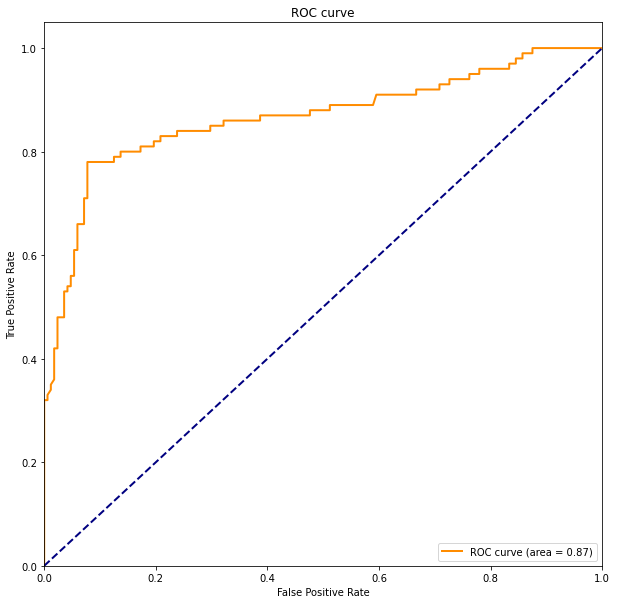

In [500]:
# test Data의 target값과 모델이 추정한 Survive할 확률을 넣어준다.
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=model4.predict_proba(x_test_transformed)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [501]:
print(recall_score(model1.predict(x_test_transformed),y_test)) # 실제로 생존한 것을, 모델이 생존했다고 예측한 수치 
print(precision_score(model1.predict(x_test_transformed),y_test)) # 모델이 생존했다고 예측한 것중에 실제로 생존한 수치
print(f1_score(model1.predict(x_test_transformed),y_test))

0.8461538461538461
0.77
0.8062827225130889


In [502]:
print(recall_score(model2.predict(x_test_transformed),y_test)) # 실제로 생존한 것을, 모델이 생존했다고 예측한 수치 
print(precision_score(model2.predict(x_test_transformed),y_test)) # 모델이 생존했다고 예측한 것중에 실제로 생존한 수치
print(f1_score(model2.predict(x_test_transformed),y_test))

0.782608695652174
0.72
0.7499999999999999


In [503]:
print(recall_score(model3.predict(x_test_transformed),y_test)) # 실제로 생존한 것을, 모델이 생존했다고 예측한 수치 
print(precision_score(model3.predict(x_test_transformed),y_test)) # 모델이 생존했다고 예측한 것중에 실제로 생존한 수치
print(f1_score(model3.predict(x_test_transformed),y_test))

0.7608695652173914
0.7
0.7291666666666667


In [504]:
print(recall_score(model4.predict(x_test_transformed),y_test)) # 실제로 생존한 것을, 모델이 생존했다고 예측한 수치 
print(precision_score(model4.predict(x_test_transformed),y_test)) # 모델이 생존했다고 예측한 것중에 실제로 생존한 수치
print(f1_score(model4.predict(x_test_transformed),y_test))

0.8571428571428571
0.78
0.8167539267015708
